# The importance of $O$ notation: A case study with three algorithms for the maximum subarray sum problem.
Written by David Zollikofer

In [1]:
import numpy as np

SIZE = 100

arr = np.random.randint(-5,5, size=(SIZE))
print(arr)

[ 0 -2  2  0  1  1  0 -4 -5 -3  3  0 -1 -2 -3 -4  0  3 -2 -4  2 -3 -1  1
 -5  3  0  2  4  2 -5 -5 -2  4  0 -3  3 -5  3 -2  1 -1  1  1 -1 -4 -3  3
  1 -3  2 -5  2  1 -3 -2  4  4  3  2 -5  4  3  3 -2 -1  0 -1  1 -5 -3 -4
  2  4  1  1 -5  2  1  0 -3 -5  0 -1  1 -2 -5  2  2  4 -4  2  2  2  2  2
  3  0 -1  2]


In [2]:
def naive(arr):
    best_sum = 0
    for i in range(len(arr)):
        for j in range(i,len(arr)):
            temp = np.sum(arr[i:j+1])
            if best_sum < temp:
                best_sum = temp
    return best_sum


#source: https://www.geeksforgeeks.org/maximum-subarray-sum-using-divide-and-conquer-algorithm/ but adapted
def divide_and_conquer(arr):
    def maxCrossingSum(arr, l, m, h):
        sm = 0
        left_sum = -10000
        for i in range(m, l-1, -1):
            sm = sm + arr[i]
            if (sm > left_sum):
                left_sum = sm
        sm = 0
        right_sum = -1000
        for i in range(m + 1, h + 1):
            sm = sm + arr[i]
            if (sm > right_sum):
                right_sum = sm
        return max(left_sum + right_sum, left_sum, right_sum)

    def maxSubArraySum(arr, l, h):
        if (l == h):
            return arr[l]
        m = (l + h) // 2
        return max(maxSubArraySum(arr, l, m),
                   maxSubArraySum(arr, m+1, h),
                   maxCrossingSum(arr, l, m, h))
    
    return maxSubArraySum(arr,0,len(arr)-1)

# source: https://en.wikipedia.org/wiki/Maximum_subarray_problem
def kadane(arr):
    best_sum = 0
    current_sum = 0
    for i in range(0,len(arr)):
        current_sum = max(0,current_sum+arr[i])
        best_sum = max(best_sum,current_sum)
    return best_sum



In [3]:
print(kadane(arr))
print(naive(arr))
print(divide_and_conquer(arr))

18
18
18


In [4]:
#source

res_kanade = %timeit  kadane(arr)
res_div_conq = %timeit divide_and_conquer(arr)
res_native = %timeit naive(arr)
res_kanade

299 µs ± 144 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.44 ms ± 771 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
73.9 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
intervals = [10,30,60,90,100,200,300,500,600,700,800,1000,1500,2000,2500,3000,4000,5000]

y_kadane = []
y_naive = []
y_div_and_conq = []

for interval in intervals:
    print("-----" + str(interval) + "-----")
    arr = np.random.randint(-5,5, size=(interval))
    res_kanade = %timeit -o kadane(arr)
    y_kadane.append(res_kanade.average)
    res_div_conq = %timeit -o divide_and_conquer(arr)
    y_div_and_conq.append(res_div_conq.average)
    res_native = %timeit -o naive(arr)
    y_naive.append(res_native.average)


    

-----10-----
37.7 µs ± 9.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
154 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
601 µs ± 61.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-----30-----
63.1 µs ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
282 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.87 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-----60-----
111 µs ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
308 µs ± 38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.41 ms ± 588 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-----90-----
105 µs ± 6.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
672 µs ± 329 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.9 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
-----100-----
129 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops ea

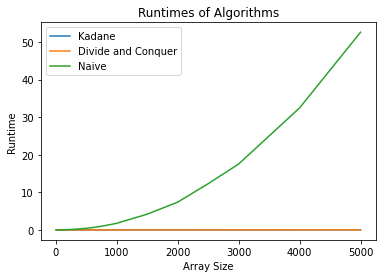

In [6]:
from matplotlib import pyplot as plt

plt.title("Runtimes of Algorithms")
plt.plot(intervals,y_kadane,label="Kadane")
plt.plot(intervals,y_div_and_conq,label="Divide and Conquer")
plt.plot(intervals,y_naive,label="Naive")
plt.xlabel("Array Size")
plt.ylabel("Runtime")
plt.legend()


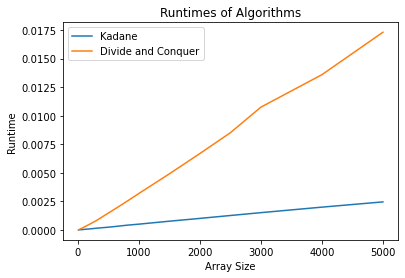

In [8]:
from matplotlib import pyplot as plt

plt.title("Runtimes of Algorithms")
plt.plot(intervals,y_kadane,label="Kadane")
plt.plot(intervals,y_div_and_conq,label="Divide and Conquer")
plt.xlabel("Array Size")
plt.ylabel("Runtime")
plt.legend()